In [2]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [87]:
#Fetching data from Tripadvisor for Six Senses Laamu
reviews = []
for page in range(0, 2920, 10):
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    source = requests.get(f'https://www.tripadvisor.in/Hotel_Review-g2050017-d2045398-Reviews-or{page}-Six_Senses_Laamu-Olhuveli_Island.html', 
                          headers = headers)
    first_container = BeautifulSoup(source.text, 'html.parser')
    for review in first_container.find_all('span', class_ = 'QewHA H4 _a'):
        reviews.append(review.text)
    
print(f'Review collected: {len(reviews)}')


Review collected: 10
Review collected: 20
Review collected: 30
Review collected: 40
Review collected: 50
Review collected: 60
Review collected: 70
Review collected: 80
Review collected: 90
Review collected: 100
Review collected: 110
Review collected: 120
Review collected: 130
Review collected: 140
Review collected: 150
Review collected: 160
Review collected: 170
Review collected: 180
Review collected: 190
Review collected: 200
Review collected: 210
Review collected: 220
Review collected: 230
Review collected: 240
Review collected: 250
Review collected: 260
Review collected: 270
Review collected: 280
Review collected: 290
Review collected: 300
Review collected: 310
Review collected: 320
Review collected: 330
Review collected: 340
Review collected: 350
Review collected: 360
Review collected: 370
Review collected: 380
Review collected: 390
Review collected: 400
Review collected: 410
Review collected: 420
Review collected: 430
Review collected: 440
Review collected: 450
Review collected: 4

In [88]:
df = pd.DataFrame({'Review': reviews})
df.to_csv('Six Senses Laamu sentiment.csv', index=False)
df.head()

,Review
0,For us it is a very special and the most wonde...
1,Where to start… Six Senses Laamu was simply ex...
2,"My second time to this resort, the resort is i..."
3,"We had the best time at six senses, a most bea..."
4,The experience of staying in Six Senses Laamu ...


In [4]:
df = pd.read_csv('Six Senses Laamu sentiment.csv')
df.head()

,Review
0,For us it is a very special and the most wonde...
1,Where to start… Six Senses Laamu was simply ex...
2,"My second time to this resort, the resort is i..."
3,"We had the best time at six senses, a most bea..."
4,The experience of staying in Six Senses Laamu ...


In [5]:
#Cleaning the text of any digit, extra space or punctuation
def clear_text(text):
    text = sent_tokenize(text.lower())
    text = ' '.join(text)
    text = re.sub('[^a-z\s]+', '', text)
    return text

df['Review (cleared)'] = df['Review'].apply(clear_text)

In [6]:
print('Normal Review: ' + df['Review'][0])
print('Cleared Review: ' + clear_text(df['Review (cleared)'][0]))

Normal Review: For us it is a very special and the most wonderfull resort you can find on earth.  The island itself it‘s magical and the moment you reach there and removing your shoes, you‘re in another, a better world.  All the staff is an unbeliveable team, which feels like one big family. This time, especially Shah, our GEM, made it, to such an memorable and unforgetable stay once again. But it‘s really difficult to find words to descripe all this, you have to go there an just feel it!
Cleared Review: for us it is a very special and the most wonderfull resort you can find on earth the island itself its magical and the moment you reach there and removing your shoes youre in another a better world all the staff is an unbeliveable team which feels like one big family this time especially shah our gem made it to such an memorable and unforgetable stay once again but its really difficult to find words to descripe all this you have to go there an just feel it


In [7]:
#Tokenising, pos_tagging, stopwords removal and lemmatising the sentence

lm = WordNetLemmatizer()
pos_dict = {'N': wordnet.NOUN, 'V': wordnet.VERB, 'R': wordnet.ADV, 'A': wordnet.ADJ}

def text_preprocess(text):
    pos_text = pos_tag(word_tokenize(text))
    tagged_list = []
    lemmatized = ''
    for word, tag in pos_text:
        if word not in set(stopwords.words('english')):
            tagged_list.append(tuple([word, pos_dict.get(tag[0])]))
    for word, tag in tagged_list:
        if not tag:
            lemmatized += ' ' + word
        else:
            lemmatized += ' ' + lm.lemmatize(word, pos = tag)
    return lemmatized

    
    
df['Review (Lemma)'] = df['Review (cleared)'].apply(text_preprocess)

In [8]:
print('Normal Review: ' + df['Review'][11])
print('Lemmatized Review: ' + text_preprocess(df['Review (Lemma)'][11]))

Normal Review: 5 out of 5   Great service from start to finish. Fantastic restaurants and loads of choice with some fantastic themed nights.  Personal service through your stay and big thanks to Ath Har our GEM.  Our ocean beach villa was amazing and very private. Breakfast in the villa was an added bonus as it is served a bit later than in the restaurant.  Loads to do if you are the active type. We mainly chilled the entire time but the fishing, snorkelling and cookery classed were great fun.   Highly recommend this 5 (6 if we could officially rate it) star resort
Lemmatized Review:  great service start finish fantastic restaurant load choice fantastic theme night personal service stay big thanks ath har gem ocean beach villa amaze private breakfast villa add bonus serve bit later restaurant load active type mainly chill entire time fish snorkelling cookery class great fun highly recommend could officially rate star resort


In [9]:
#Analysing the sentiment of reviews based on vadersentiment analyser
sia = SentimentIntensityAnalyzer()
def sentiment_intensity_analyser(text):
    score_dict = sia.polarity_scores(text)
    if score_dict.get('compound') > 0.05:
        return 'Positive'
    elif score_dict.get('compound') < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
df['Polarity score'] = df['Review (Lemma)'].apply(lambda x: float(sia.polarity_scores(x).get('compound')))
df['Sentiment Overview'] = df['Review (Lemma)'].apply(sentiment_intensity_analyser)

In [10]:
#Checking polarity of score of single review
print('Review: '+ df['Review'][11])
print(sia.polarity_scores(df['Review'][11]))

Review: 5 out of 5   Great service from start to finish. Fantastic restaurants and loads of choice with some fantastic themed nights.  Personal service through your stay and big thanks to Ath Har our GEM.  Our ocean beach villa was amazing and very private. Breakfast in the villa was an added bonus as it is served a bit later than in the restaurant.  Loads to do if you are the active type. We mainly chilled the entire time but the fishing, snorkelling and cookery classed were great fun.   Highly recommend this 5 (6 if we could officially rate it) star resort
{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'compound': 0.9806}


In [11]:
sentiment_df = pd.DataFrame(df['Sentiment Overview'].value_counts()).reset_index()
sentiment_df

,Sentiment Overview,count
0,Positive,2893
1,Negative,17
2,Neutral,3


In [12]:
#Plotting against the sentiment of tourists
color = ['gold', 'red', 'green']

fig = px.pie(data_frame=sentiment_df, 
             values = 'count', 
             names = 'Sentiment Overview', 
             title = 'Sentiment of Tourists towards Six Senses Laamu', 
             width=600, height=600)
fig.update_traces(marker = dict(colors = color, line=dict(color = 'black', width = 1.5)))
fig.show()

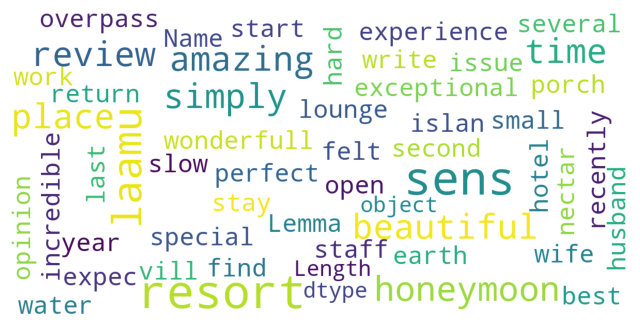

In [20]:
#Making the wordcloud of most used words by the tourists

def wordcloud_generator(column):
    wordcloud = WordCloud(background_color='white',
                          max_words=150,
                          max_font_size=30,
                          stopwords=set(STOPWORDS),
                          min_word_length=4,
                          scale = 3,
                          random_state = 0)
    wordcloud = wordcloud.generate(str(column))
    plt.subplots(figsize = (8, 6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
wordcloud_generator(df['Review (Lemma)'])
